In [1]:
%load_ext autoreload
%autoreload 2

In [8]:
#%cd ..

/home/bernat/Documents/IML/Clustering-Algorithms


In [2]:
%cd code

/home/bernat/Documents/IML/Clustering-Algorithms/code


In [3]:
from preprocessing import preprocess_sick, preprocess_grid, preprocess_vowel
from fuzzyclustering import gs_fcm, update_membership_matrix
from utils import plot_clusters
import numpy as np
from main import load_ds

In [6]:
from scipy.io.arff import loadarff
import pandas as pd
df_sick, meta_train = loadarff(f'../datasets/sick.arff')

# Define datasets
df_sick = pd.DataFrame(df_sick)

# Decode utf8 columns
for col in df_sick.columns:
    df_sick[col].map(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)

In [9]:
count = (df_sick["age"] > 90).sum()
print(count)

9


In [40]:
np.random.seed(42)  # For reproducibility
data = np.random.rand(10, 2)
centers = np.array([[0.2, 0.5], [0.8, 0.7], [0.4, 0.9]])
# Fuzziness parameter
m = 1.01
membership_matrix = update_membership_matrix(data, centers, m)

# Output Results
print("Data Points:")
print(data)
print("\nCluster Centers:")
print(centers)
print("\nMembership Matrix:")
print(membership_matrix)
print("\nSum of memberships for each data point (should be 1):")
print(np.sum(membership_matrix, axis=0))

Data Points:
[[0.37454012 0.95071431]
 [0.73199394 0.59865848]
 [0.15601864 0.15599452]
 [0.05808361 0.86617615]
 [0.60111501 0.70807258]
 [0.02058449 0.96990985]
 [0.83244264 0.21233911]
 [0.18182497 0.18340451]
 [0.30424224 0.52475643]
 [0.43194502 0.29122914]]

Cluster Centers:
[[0.2 0.5]
 [0.8 0.7]
 [0.4 0.9]]

Membership Matrix:
[[8.68676270e-187 4.50807382e-130 1.00000000e+000 2.46249906e-012
  6.15157786e-072 9.12111187e-024 2.78433283e-031 1.00000000e+000
  1.00000000e+000 1.00000000e+000]
 [1.17774724e-188 1.00000000e+000 7.10239443e-078 1.02339902e-069
  1.00000000e+000 1.00092083e-066 1.00000000e+000 1.04379153e-081
  6.67290818e-139 5.85840209e-050]
 [1.00000000e+000 9.51624939e-114 1.84561461e-071 1.00000000e+000
  9.62229079e-030 1.00000000e+000 7.38932086e-045 2.18313239e-075
  2.44957690e-112 6.89385195e-059]]

Sum of memberships for each data point (should be 1):
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [45]:
df_X = load_ds("grid")

Convergence after 30 iterations.
Cluster 0 - Points shape: (242, 2)
Cluster 1 - Points shape: (232, 2)
Cluster 2 - Points shape: (235, 2)
Cluster 3 - Points shape: (211, 2)
Cluster 4 - Points shape: (285, 2)
Cluster 5 - Points shape: (219, 2)
Cluster 6 - Points shape: (220, 2)
Cluster 7 - Points shape: (244, 2)


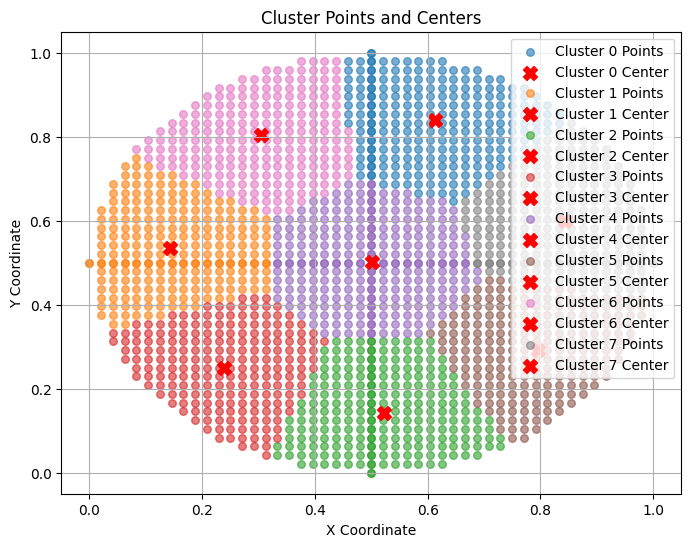

In [82]:
# Number of clusters
C = 8
m = 2
suppress = True
alpha = 0.5

clusters = gs_fcm(df_X, C, m=m, suppress=suppress, alpha=alpha, generalized=True, eta=0.5)
    
plot_clusters(clusters)